In [79]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.util as cutil
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
from pyproj import Proj

## Function Land

In [2]:
def viewingangle(latP,lonP):
    R = 6.37*10**6 #Radius of the Earth (m)
    H = 35786023.0 #Height of satellite from Earth's surface (m)
    r = R + H      #Height of satellite from the center of the Earth (m)
    lonS = [-75.0] #Longitude of the satellite (deg)
    ratio = R/r
    
    #Converting to radians and making sure the longitudes are positive from east
    lonS = np.radians(pos_lon(lonS))
    lonP = np.radians(pos_lon(lonP))
    latP = np.radians(latP)
    #GEOMETRY (see notebook from 6/6 for diagram)
    gamma = np.arccos(np.cos(latP)*np.cos(lonS-lonP))
    print (gamma)
    d = r*np.sqrt(1+(ratio**2)-(2*ratio*np.cos(gamma)))
    v = np.arccos((r/d)*np.sin(gamma))
    v = np.degrees(v)
    
    return v

In [3]:
def pos_lon(lon):
    array = np.arange(0,len(lon),1)
    for i in array:
        if lon[i]<0:
            lon[i] = lon[i]+360
    return lon

## Viewing-Angle Calculations

In [4]:
latP = np.arange(-90,90,.1)    #Latitude of the point of interest (deg)
lonP = np.arange(-180,180,.1)   #Longitude of the point of interets (deg)

XX,YY = np.meshgrid(lonP,latP)
XX = np.ndarray.flatten(XX)
YY = np.ndarray.flatten(YY)

angle = viewingangle(YY,XX)
angle2d = np.reshape(angle, (len(latP),len(lonP)))

3600 1800


In [5]:
angle = viewingangle(YY,XX)
angle2d = np.reshape(angle, (len(latP),len(lonP)))

[1.57079633 1.57079633 1.57079633 ... 1.57125687 1.57125393 1.57125099]


## Subarray Boundary Locations

In [136]:
x0=np.zeros(20)
y0=np.arange(0,2,0.1)*35786023.0

sat_h = 35786023.0
sat_lon = -75.0
sat_sweep = 'x'
p = Proj(proj='geos', h=sat_h, lon_0=sat_lon, sweep=sat_sweep)

In [160]:
#Lats and lons from random points that were approximated to be the edges of the subarray
lats=np.array([53.195,49.844,45.707,41.608,37.654,33.881,30.077,26.848,22.239,18.682,14.648,10.870])
lons=np.array([82.010,63.791,84.758,87.297,75.644,77.974,84.166,81.045,82.126,91.997,83.271,71.533])*-1

xs, ys = p(lons,lats)
subarray_ys = np.ones((80,12)) * ys.T
subarray_ys = subarray_ys.T
x_horiz=np.arange(2,-2,-0.05)*35786023.0

## Plotting

In [175]:
bounds = np.arange(0,100,10)
bounds1 = np.arange(0,95,5)
lon_bounds = np.arange(-140,-50,10)
data_crs = ccrs.PlateCarree()
data_crs2 = ccrs.Geostationary(central_longitude=-75, satellite_height=35786023.0,sweep_axis='x')
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()

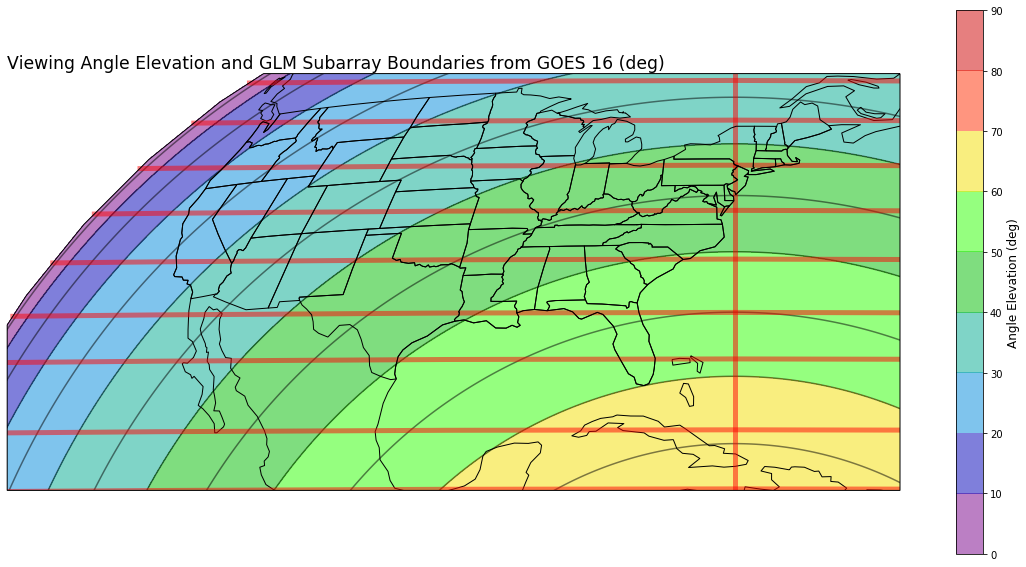

In [177]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,1,1, projection=ccrs.Geostationary(-75, 35786023.0))

one = ax1.contourf(lonP, latP, angle2d, levels=bounds, transform=data_crs, cmap=plt.get_cmap('nipy_spectral'), alpha=0.5)
ax1.contour(lonP, latP, angle2d, levels=bounds1, transform=data_crs, colors='k',alpha=0.5)

ax1.plot(x0, y0, transform=data_crs2, color='r', linewidth='5', alpha=0.5)
for i in np.arange(0,12,1):
    ax1.plot(x_horiz,subarray_ys[i,:], transform=data_crs2, color='r', linewidth='5', alpha=0.5)


ax1.add_feature(cfeature.STATES, zorder=8)
ax1.set_global()
ax1.coastlines()
#grid_one = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
#ax1.set_xticks(lon_bounds, crs=ccrs.PlateCarree())
#ax1.set_yticks([ 20, 30, 40, 50, 60], crs=ccrs.PlateCarree())
ax1.set_extent([-130, -65, 20, 50]) #CONUS
#ax1.set_extent([-130, -65, 5, 55])
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_title('Viewing Angle Elevation and GLM Subarray Boundaries from GOES 16 (deg)', loc='left', fontsize='xx-large')
#ax1.set_title('Kevin Thiel: @thielwx', loc='right', fontsize='xx-large')
cbar_one = plt.colorbar(one)
cbar_one.set_label('Angle Elevation (deg)', fontsize='large')
#plt.savefig('../Desktop/angle2_pltcar.png')
ax1.gridlines()
plt.show()